In [1]:
import pandas as pd

data=pd.read_csv('data/baron/BaronMatrix.csv',index_col=0)
annotation=pd.read_csv('data/baron/BaronMetaData.csv',index_col=0)

In [2]:
annotation["celltype"]=annotation["cell.type"]

In [3]:
base_dir="data/baron"

In [4]:
data_sparse=data


#statistics of cells expressing each gene
gene_expressed_cell_number=data_sparse.astype(bool).sum(axis=0)

print(len(gene_expressed_cell_number))
#filter gene expressed in less than 10 cells
gene_expressed_cell_number=gene_expressed_cell_number[gene_expressed_cell_number>600]
print(len(gene_expressed_cell_number))

data_rm_sparse=data_sparse[gene_expressed_cell_number.index.tolist()]
data_rm_sparse.shape           #10k cells, 4487 genes

full_data=data_rm_sparse

20125
7331


In [5]:
# gene number = 200, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000
import psutil


memory_start=psutil.virtual_memory().used

n=500

data_rm_sparse=full_data.sample(axis=1,n=n)

data_rm_sparse

,ZNF821,PRPF40B,USF2,MTX2,CNOT3,UGCG,UBXN6,EDEM3,TJP2,POU5F2,...,U2AF1L4,COPS5,IGFBP5,RNF113A,YWHAH,IARS2,IL6R,ZCCHC2,C12orf75,ALG3
human1_lib1.final_cell_0001,0,0,2,0,0,0,1,0,0,1,...,0,1,0,0,2,1,0,0,0,2
human1_lib1.final_cell_0002,2,0,1,1,0,1,1,0,1,2,...,0,1,0,0,1,0,0,0,0,4
human1_lib1.final_cell_0003,0,0,1,3,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
human1_lib1.final_cell_0004,0,0,3,1,0,0,0,0,1,0,...,0,1,0,0,4,0,0,0,1,0
human1_lib1.final_cell_0005,0,0,0,0,2,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
human4_lib3.final_cell_0697,0,0,0,0,0,1,1,0,0,0,...,0,0,23,0,0,0,0,0,0,0
human4_lib3.final_cell_0698,0,0,0,0,0,0,1,0,1,0,...,0,2,0,0,0,0,1,0,1,0
human4_lib3.final_cell_0699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
human4_lib3.final_cell_0700,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
import pickle
TF_gene_dict=pickle.load(open("human/TF_gene_dict","rb"))

len(TF_gene_dict)

1209

In [7]:
#generate gene_to_TF_transform_matrix
import numpy as np
import pickle

TF_gene_dict=pickle.load(open("human/TF_gene_dict","rb"))


gene_number=len(data_rm_sparse.columns.to_list())    

TF_number=len(TF_gene_dict)

gene_to_TF_transform_matrix=np.zeros((gene_number,TF_number))

TF_list=TF_gene_dict.keys()
for i,gene in enumerate(data_rm_sparse.columns):
    try:
        j=TF_list.index("gene")
        gene_to_TF_transform_matrix[i][j]=1
    except:
        pass
        
gene_to_TF_transform_matrix

pickle.dump(gene_to_TF_transform_matrix,open("%s/gene_to_TF_transform_matrix" %base_dir,"wb"))

In [8]:
#generate TF_mask

import numpy as np

gene_TF_dict=pickle.load(open("human/gene_TF_dict","rb"))

gene_number = len(data_rm_sparse.columns.to_list())    #6033
TF_number = len(TF_gene_dict)

TF_mask = np.zeros((gene_number,TF_number))
error_count=0

for i,gene_id in enumerate(data_rm_sparse.columns):

    for j,TF in enumerate(TF_gene_dict):
        if TF in gene_TF_dict.get(gene_id,[]):
            TF_mask[i][j]=1
        else:
            error_count+=1
        
print(error_count)
print(TF_mask)

pickle.dump(TF_mask,open("%s/TF_mask" %base_dir,"wb"))

393409
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [9]:
#generate GO_mask

GO_dict={}
with open("human/goa_human.gaf") as f:
    for line in f:
        if line[0] == "!":
            continue
        
        gene_id=line.split("\t")[2]
        GO_term=line.split("\t")[4]
        if GO_term not in GO_dict:
            GO_dict[GO_term]=[]
        GO_dict[GO_term].append(gene_id)


GO_list=[]
count=0
for item in GO_dict:
    if len(GO_dict[item])>=30:
        count+=1
        GO_list.append(item)
print(count)


gene_dict={}
with open("human/goa_human.gaf") as f:
    for line in f:
        if line[0]=="!":
            continue
        gene_id=line.split("\t")[2].upper()
        GO_term=line.split("\t")[4]
        if gene_id not in gene_dict:
            gene_dict[gene_id]=[]
        gene_dict[gene_id].append(GO_term)



gene_number=len(data_rm_sparse.columns)    #6033
GO_number=len(GO_list)  

GO_mask=np.zeros((gene_number,GO_number))
error_count=0

for i,gene_id in enumerate(data_rm_sparse.columns):

    for j,GO_term in enumerate(GO_list):
        if GO_term in gene_dict.get(gene_id,"GO:default"):

            GO_mask[i][j]=1
        else:
            error_count+=1
        
print(error_count)

pickle.dump(GO_mask,open("%s/GO_mask" %base_dir,"wb"))


1946
966768


In [10]:
#generate GO_TF_mask

TF_number=len(TF_gene_dict)
GO_number=len(GO_list) 

GO_TF_mask=np.zeros((TF_number,GO_number))
error_count=0

for i,TF in enumerate(TF_gene_dict):
    for j,GO in enumerate(GO_list):
        if GO in gene_dict.get(TF,"GO:default"):
            GO_TF_mask[i][j]=1
        else:
            error_count+=1
print(error_count)
        
GO_TF_mask

pickle.dump(GO_TF_mask,open("%s/GO_TF_mask" %base_dir,"wb"))


2332169


In [11]:
def calculate_multiclass_f1_score(true_labels, predicted_labels):
    if len(true_labels) != len(predicted_labels):
        raise ValueError("Input lists must have the same length.")

    unique_labels = set(true_labels + predicted_labels)
    f1_scores = []

    for label in unique_labels:
        true_positive = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == label and pred == label)
        false_positive = sum(1 for true, pred in zip(true_labels, predicted_labels) if true != label and pred == label)
        false_negative = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == label and pred != label)

        precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
        recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0

        f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
        f1_scores.append(f1)

    macro_f1 = sum(f1_scores) / len(f1_scores)
    return macro_f1

In [12]:
#GO_Net
import math
import numpy as np
import pandas as pd
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.model_selection import train_test_split as ts

data_rm_sparse=data_rm_sparse

data_rm_sparse.index=annotation["celltype"].to_list()

###############################################################
gene_to_TF_transform_matrix=pickle.load(open("%s/gene_to_TF_transform_matrix" %base_dir,"rb"))
TF_mask=pickle.load(open("%s/TF_mask" %base_dir,"rb"))
GO_mask=pickle.load(open("%s/GO_mask" %base_dir,"rb"))
GO_TF_mask=pickle.load(open("%s/GO_TF_mask" %base_dir,"rb"))
###############################################################
#data_annotation = pd.read_csv('data/macparland/GSE115469_CellClusterType.txt', sep="\t")
#index_rename_dict = {key: value for key, value in zip(data_annotation['CellName'], data_annotation['CellType'])}
#$data_rm_sparse=data_rm_sparse.rename(index=index_rename_dict)

#normalize by row
#data_rm_sparse = data_rm_sparse.apply(lambda row: row / np.linalg.norm(row), axis=1)

#merge similar cell types
#data_rm_sparse.index = data_rm_sparse.index.str.replace('Hepatocyte_\d+', 'Hepatocyte', regex=True)
#data_rm_sparse.index = data_rm_sparse.index.str.replace('gamma-delta_T_Cells_\d+', 'gamma-delta_T_Cells', regex=True)


#filter low count cells
#data_rm_sparse = data_rm_sparse[data_rm_sparse.index != 'Hepatic_Stellate_Cells']


#novel_cell_type = ['Plasma_Cells']

#data_rm_sparse_novel = data_rm_sparse[data_rm_sparse.index.isin(novel_cell_type)]
#data_rm_sparse_rest = data_rm_sparse[~data_rm_sparse.index.isin(novel_cell_type)]




classes=[]
for celltype in data_rm_sparse.index:
    if celltype not in classes:
        classes.append(celltype)
#print(len(classes),classes)


label_dict_revese={}
label_dict={}
for i,celltype in enumerate(classes):
    label_dict[celltype]=i
    label_dict_revese[i]=celltype
label_dict
################################################################



def gen_mask(row,col,percent=0.5,num_zeros=None):
    if num_zeros is None:
        #Total number being masked is 0.5 by default
        num_zeros=int((row*col)*percent)
    
    mask=np.hstack([np.zeros(num_zeros),np.ones(row*col-num_zeros)])
    np.random.shuffle(mask)
    return mask.reshape(row,col)

class LinearFunction(torch.autograd.Function):
    """
    autograd function which masks it's weights by 'mask'.
    """
    
    #Not that both forward and backword are @staticmethod

    
    #bias, mask is an optional argument
    @staticmethod
    def forward(ctx, input, weight, bias=None, mask=None):
        if mask is not None:
            #change weight to 0 where mask == 0

            weight=weight*mask
 
        output=input.mm(weight.t())

        if bias is not None:
            output+=bias.unsqueeze(0).expand_as(output)
        
        ctx.save_for_backward(input, weight, bias, mask)

        return output
    
    #This function has noly a single output, so it gets only one gradient
    @staticmethod
    def backward(ctx,grad_output):
        input,weight,bias,mask = ctx.saved_tensors
        grad_input=grad_weight=grad_bias=grad_mask=None
        
        #These meeds_input_grad checks are optional and there only to improve efficiency.
        #If you want to make your code simpler, you can skip them. Returning gradients for
        #inputs that don't require it is not an error.
        if ctx.needs_input_grad[0]:
            grad_input=grad_output.mm(weight)
        
        if ctx.needs_input_grad[1]:
            grad_weight=grad_output.t().mm(input)
            
            if mask is not None:
                
                #change grad_weight to 0 where mask == 0
                grad_weight=grad_weight*mask

        
        #if bias is not None and ctx.need_input_grad[2]:
        if ctx.needs_input_grad[2]:
            grad_bias=grad_output.sum(0).squeeze(0)
        
        return grad_input,grad_weight,grad_bias,grad_mask
    

       
class CustomizedLinear(nn.Module):
    def __init__(self,input_features,output_features, bias=None, mask=None):
        """
        Arguments
        mask [numpy array]:
            The shape is (n_input_fearues,n_output_features).
            The elements are 0 or 1 which delcare un-connected or connected.
            
        bias [bool]:
            flg of bias.
        """
        super(CustomizedLinear,self).__init__()
        self.input_features=input_features
        self.out_features=output_features
        
        #nn.Parameter is a spetial kind of Tensor, that will get
        #automatically registered as Module's parameter once it's assigned
        #as an attribute
        self.weight=nn.Parameter(torch.Tensor(self.out_features,self.input_features))
        
        if bias:

            self.bias=nn.Parameter(torch.Tensor(self.out_features))
        else:
            #You should always register all possible parameters, but the
            #optinal ones can be None if you want.
            self.register_parameter("bias",None)
            
        #Initialize the above parameters (weight and bias). Important!
        self.init_params()
        
        #mask should be registered after weight and bias
        if mask is not None:
            mask=torch.tensor(mask,dtype=torch.float).t()
            self.mask=nn.Parameter(mask,requires_grad=False)
        else:
            self.register_parameter("mask",None)

        
    def init_params(self):
        stdv=1./math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv,stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv,stdv)
                
    def forward(self,input):
        #See the autograd section for explanation of what happens here.
        
        output=LinearFunction.apply(input,self.weight,self.bias,self.mask)
        
        return output
        
    def extra_repr(self):
        #(Optional) Set the extra informatioin about this module. You can test
        #it by printing an object of this class.
        return "input_features={}, output_features={}, bias={}, mask={}".format(
            self.input_features, self.out_features,
            self.bias is not None, self.mask is not None)
        
        
class GO_Net(nn.Module):
    def __init__(self,in_size,out_size,ratio=[0.006525,0,0]):
        super(GO_Net,self).__init__()

        self.gene_number=len(data_rm_sparse.columns)    #6033
        self.TF_number=1209
        self.GO_number=len(GO_list)
        self.class_number=3

        self.gene_to_TF_transform_matrix=torch.tensor(gene_to_TF_transform_matrix,dtype=torch.float32)
    
        
        self.bn0=nn.BatchNorm1d(self.gene_number)
        #self.fc1=CustomizedLinear(in_size,2290,mask=gen_mask(3443,2290,ratio[0]))  
        #self.fc1=CustomizedLinear(in_size,1946,mask=gen_mask(2903,1946,ratio[0]))        
        self.fc1=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        self.gene_to_GO_layer=CustomizedLinear(in_size,self.GO_number,mask=GO_mask)    #GO_term
        #self.fc1=CustomizedLinear(in_size,2290,mask=np.ones((3443,2290)))
    
        self.bn1=nn.BatchNorm1d(self.GO_number)
                
        self.fc2=CustomizedLinear(self.GO_number,out_size,mask=gen_mask(self.GO_number,out_size,ratio[1]))
        self.bn2=nn.BatchNorm1d(out_size)

        self.gene_to_TF_layer=CustomizedLinear(self.gene_number,self.TF_number,mask=TF_mask)
        self.TF_to_GO_layer=CustomizedLinear(self.TF_number,self.GO_number,mask=GO_TF_mask)
        
        self.fc3=CustomizedLinear(100,100,mask=gen_mask(100,100,ratio[1]))

        self.fc4=CustomizedLinear(100,out_size,mask=gen_mask(100,out_size,ratio[1]))
        
        self.relu=nn.ReLU()
        self.leaky_relu=nn.LeakyReLU()
        #self.dropout = nn.Dropout(0.1)
        for module in self.modules():
            if isinstance(module,nn.Linear):
                nn.init.uniform_(module.weight,a=0,b=1)
            elif isinstance(module,(nn.BatchNorm1d,nn.GroupNorm)):
                nn.init.constant_(module.weight,1)
                nn.init.constant_(module.bias,0)

                        
    def forward(self,x):

        #x=self.bn0(x)
        TF_residul=torch.matmul(x,self.gene_to_TF_transform_matrix)

        TF_derived_from_gene=self.gene_to_TF_layer(x)

        TF_sum=TF_residul+TF_derived_from_gene
        #TF_sum=TF_derived_from_gene

        GO_derived_from_TF=self.TF_to_GO_layer(TF_sum)

        GO_derived_from_gene=self.gene_to_GO_layer(x)

        GO_sum=GO_derived_from_TF+GO_derived_from_gene

        #x=self.bn0(x)
        #x=self.fc1(x)
        #x=self.bn1(x)
        #x=self.relu(x)
        #x=self.dropout(x)
        GO_sum=self.leaky_relu(GO_sum)

        #x=torch.tanh(x) 
        #print(161,self.fc1.weight)
        x=self.fc2(GO_sum)
        #x=self.bn2(x)
        #x=self.relu(x)
        #x=self.leaky_relu(x)
        #x=self.fc3(x)
        #x=self.leaky_relu(x)
        #x=self.fc4(x)
 
        return x,GO_sum,TF_derived_from_gene,GO_derived_from_TF

"""
class Reconstraction(nn.Module):
    def __init__(self,in_size,out_size):
        super(Reconstraction,self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(in_size, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 500),
            nn.LeakyReLU(True),
            nn.Linear(500, 1000),
            nn.LeakyReLU(True),
            nn.Linear(1000, out_size)
        )

    def forward(self, x):
        x = self.decoder(x)
        return x
"""     


 
class MyDataset(Dataset):
    def __init__(self, x,y):
        self.x=x
        self.y=y

    def __getitem__(self, index):
        features = self.x[index]
        label = self.y[index]
        return features, label

    def __len__(self):
        return len(self.x)

def accuracy_score(y_test,y_pred):
    t=0
    f=0
    for i in range(len(y_test)):
        if y_test[i]==y_pred[i]:
            t+=1
        else:
            f+=1
    return(t/(t+f))



from torch.utils.data import WeightedRandomSampler

def make_weights_for_balanced_classes(dataset, nclasses):
    count = [0] * nclasses
    for item in dataset:
        count[item[1]] += 1
    weight_per_class = [0.] * nclasses
    N = float(sum(count))
    for i in range(nclasses):
        weight_per_class[i] = N/float(count[i])
    weight = [0] * len(dataset)
    for idx, val in enumerate(dataset):
        weight[idx] = weight_per_class[val[1]]
    return weight


class CustomWeightedRandomSampler(WeightedRandomSampler):
    """WeightedRandomSampler except allows for more than 2^24 samples to be sampled"""
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def __iter__(self):
        rand_tensor = np.random.choice(range(0, len(self.weights)),
                                       size=self.num_samples,
                                       p=self.weights.numpy() / torch.sum(self.weights).numpy(),
                                       replace=self.replacement)
        rand_tensor = torch.from_numpy(rand_tensor)
        return iter(rand_tensor.tolist())





#training
input_size = len(data_rm_sparse.columns)
output_size = len(classes)

learning_rate = 0.1
epochs = 3


#reconstraction_optimizer = optim.Adam(reconstraction_model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()
#reconstraction_criterion = nn.MSELoss()



data_train_x=data_rm_sparse
data_train_y=data_rm_sparse.index


#5-fold cross validation
import numpy as np
from sklearn.model_selection import KFold

num_folds = 5

# Generate 5-fold cross-validation indices
kf = KFold(n_splits=num_folds, shuffle=False)
fold_indices = list(kf.split(data))

# Perform 5-fold cross-validation
for fold, (train_indices, test_indices) in enumerate(fold_indices, start=1):

    #define model and optimizer
    model = GO_Net(input_size, output_size,ratio=[0,0,0])
    optimizer = optim.Adam(model.parameters(), lr=0.001)


    # Subset data and annotation based on indices
    x_train = data_train_x.iloc[train_indices].to_numpy()
    y_train = data_train_y[train_indices,]
    
    x_test = data_train_x.iloc[test_indices].to_numpy()
    y_test = data_train_y[test_indices,]

    # Continue with your operations on data_train, anno_train, data_test, and anno_test




    #x_train,x_test,y_train,y_test = ts(data_train_x.to_numpy(),data_train_y.to_numpy(),test_size=0.2,random_state=1, shuffle=True)

    #x_train=x_train[0:400]
    #y_train=y_train[0:400]

    #label_dict={25:0,26:1,27:2,33:3,34:4}
    y_train_relabeled=[label_dict[label] for label in y_train]
    y_test_relabeled=[label_dict[label] for label in y_test]


    #train_size=20000

    #x_train=x_train[0:train_size]
    #y_train_relabeled=y_train_relabeled[0:train_size]

    train_data=MyDataset(x_train,y_train_relabeled)



    #for unbalanced data
    """
    weights=make_weights_for_balanced_classes(train_data,len(classes))
    weights = torch.DoubleTensor(weights)
    sampler = CustomWeightedRandomSampler(weights, len(weights))        #sampler for imbalanced classes
    """

    #train_loader=DataLoader(train_data, batch_size=60, sampler=sampler)
    train_loader=DataLoader(train_data, batch_size=60, shuffle=True)

    num_epochs=15
    # 训练模型
    for epoch in range(num_epochs):
        running_loss = 0.0
        reconstraction_running_loss = 0.0

        

        for i, batch in enumerate(train_loader, 0):
            inputs, labels = batch
            #print(labels)
            inputs=Variable(inputs).to(torch.float32)
            labels=Variable(labels).to(torch.long)
            # 将梯度缓存清零
            optimizer.zero_grad()

            # 前向传播、计算损失和反向传播
            outputs,_,_,_ = model(inputs)

            loss = criterion(outputs, labels)

            #reconstraction_input=reconstraction_model(outputs)
            #reconstraction_loss = reconstraction_criterion(reconstraction_input, inputs)

            #reconstraction_optimizer.zero_grad()

            #combined_loss=loss+reconstraction_loss
            #combined_loss.backward()
            loss.backward()
        
            optimizer.step()
            #reconstraction_optimizer.step()


            #reconstraction_running_loss += reconstraction_loss.item()
            running_loss += loss.item()

            if i % 40 == 0:
                pass
                #print(i)
                #print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
            
            if i>400:
                break

        test_data=MyDataset(x_test,y_test_relabeled)
        test_loader=DataLoader(test_data, batch_size=32, shuffle=False)
        result=[]
        for i, batch in enumerate(test_loader):
            inputs, labels = batch
            
            inputs=Variable(inputs).to(torch.float32)

            labels=Variable(labels).to(torch.long)
            
            outputs,_,_,_ = model(inputs)
            pred = list(torch.max(outputs, 1)[1].numpy())
            result.extend(pred)
            #print(pred,labels)
            if i>100:
                break
        accuracy = accuracy_score(y_test_relabeled[0:len(result)],result)
        f1_score = calculate_multiclass_f1_score(y_test_relabeled[0:len(result)],result)
                #########
        memory_end=psutil.virtual_memory().used
        print("memory:",memory_end-memory_start,memory_end)
        
        print("fold %s-%s" %(fold,epoch),"\taccuracy:\t",accuracy,"\tloss:\t",running_loss / len(train_loader)," \tf1 score:\t",f1_score )
        
        #save model
        #pickle.dump(model,open("model/GO_heart.model","wb"))
        
        


memory: 1335685120 25641496576
fold 1-0 	accuracy:	 0.851808634772462 	loss:	 0.6818921240775482  	f1 score:	 0.48325156998028196
memory: 1334550528 25640361984
fold 1-1 	accuracy:	 0.9025670945157527 	loss:	 0.2709267908140369  	f1 score:	 0.6369497094368168
memory: 1334808576 25640620032
fold 1-2 	accuracy:	 0.926487747957993 	loss:	 0.1697746963928575  	f1 score:	 0.6709133863694383
memory: 1285058560 25590870016
fold 1-3 	accuracy:	 0.9165694282380397 	loss:	 0.12435587796828021  	f1 score:	 0.7172248030586023
memory: 1278726144 25584537600
fold 1-4 	accuracy:	 0.9189031505250875 	loss:	 0.07552665180486182  	f1 score:	 0.7373074382589081
memory: 1282433024 25588244480
fold 1-5 	accuracy:	 0.925904317386231 	loss:	 0.05607967447975407  	f1 score:	 0.7963198098665408
memory: 1278717952 25584529408
fold 1-6 	accuracy:	 0.9235705950991832 	loss:	 0.035605539450340944  	f1 score:	 0.7298341116384144
memory: 1284288512 25590099968
fold 1-7 	accuracy:	 0.9159859976662778 	loss:	 0.024038

  Probabilities  Proportion
0           100      25.636
1           200      25.619
2           500      25.591
3          1000      25.609
4          2000      25.568
5          3000      25.595
6          4000      25.832
7          5000      26.043
8          6000      26.355
9          7000      26.488


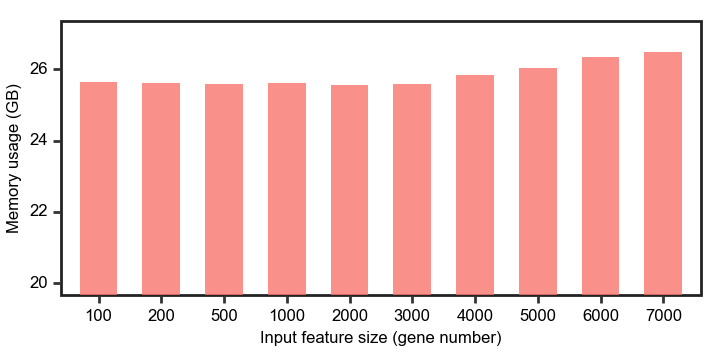

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.54 x 1.8 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/memory_usage_with_gene_number.pdf


In [26]:
#probabilities cutoff barplot
X=["100","200","500","1000","2000","3000","4000","5000","6000","7000"]
Y=[25.636, 25.619, 25.591,25.609, 25.568, 25.595, 25.832, 26.043, 26.355, 26.488]

import pandas as pd
from plotnine import *

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

data=pd.DataFrame(dict(Probabilities=X,Proportion=Y)) 
data['Probabilities'] = pd.Categorical(data.Probabilities, categories=pd.unique(data.Probabilities))  #reorder legend

print(data)
p1 = (ggplot()
        +geom_bar(data,aes(x="Probabilities",y = "Proportion"),stat="identity",width=0.6,fill=c1,alpha=0.8)
        
        +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            axis_text_x=element_text(rotation=0, hjust=0.5),
            figure_size=[3.54,1.8],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.60,0.4),
            legend_key_size=4) #change legend text font size
        

        +labs(x = "Input feature size (gene number)", y ="Memory usage (GB)")
        +guides(color = guide_legend(title = "Probability cutoff"))
        #+ylim(10,30)   # not work.
        + coord_cartesian(ylim=(20, 27))
        
)
print(p1)
p1.save('figure/memory_usage_with_gene_number.pdf')